In [9]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np

import pandas as pd
import numpy as np
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from datetime import datetime
from scipy import stats
import researchpy as rp

In [31]:
user_performance = pd.read_csv('data.csv', index_col='PID').dropna()

tukey = pairwise_tukeyhsd(endog=user_performance['bpm_literal'], 
    groups=user_performance['condition'],
    alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2   meandiff p-adj   lower  upper  reject
--------------------------------------------------------
copilot       ctrl  -0.0785 0.4164 -0.2361 0.0791  False
copilot thinkaloud  -0.0941 0.2182  -0.234 0.0457  False
   ctrl thinkaloud  -0.0157 0.9655  -0.178 0.1466  False
--------------------------------------------------------


condition
copilot       0.446512
ctrl          0.368026
thinkaloud    0.352367
Name: bpm_literal, dtype: float64
condition
copilot       0.080894
ctrl          0.150294
thinkaloud    0.066614
Name: bpm_literal, dtype: float64


{'whiskers': [<matplotlib.lines.Line2D at 0x7fb0ba91e640>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb0ba91ebe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb0ba91e370>,
 'medians': [<matplotlib.lines.Line2D at 0x7fb0ba9281c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fb0ba928490>,
 'means': []}

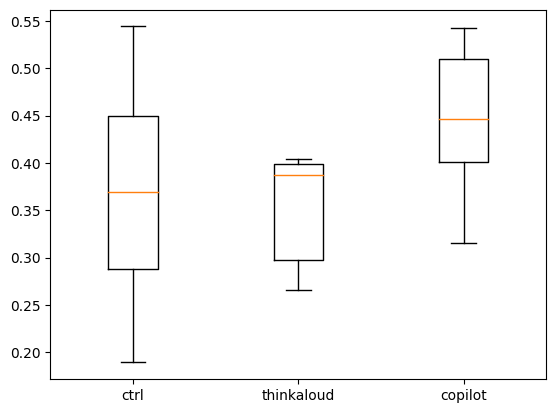

In [84]:
means = user_performance.groupby('condition').mean()
stds = user_performance.groupby('condition').std()

print(user_performance.groupby(['condition'])['bpm_literal'].mean())
print(user_performance.groupby(['condition'])['bpm_literal'].std())


ctrl = user_performance[user_performance['condition'] == 'ctrl']
thinkaloud = user_performance[user_performance['condition'] == 'thinkaloud']
copilot = user_performance[user_performance['condition'] == 'copilot']

groups = [ctrl['bpm_literal'], thinkaloud['bpm_literal'], copilot['bpm_literal']]

plt.boxplot(groups, labels=['ctrl', 'thinkaloud', 'copilot'])

In [39]:
from pingouin import ancova
ancova(data=user_performance, dv='bpm_literal', covar='pretest', between='condition')
# user_performance.plot(x='pretest', y='actual', kind='scatter', figsize=(10, 8))

,Source,SS,DF,F,p-unc,np2
0,condition,0.041942,2,3.575574,0.057901,0.354875
1,pretest,0.052970,1,9.031589,0.010136,0.409938
2,Residual,0.076245,13,NaN,NaN,NaN


In [33]:
import statsmodels.api as sm

x = user_performance['pretest']
y = user_performance['bpm_literal']

model = sm.OLS(y, x).fit()
predictions = model.predict(x)
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            bpm_literal   R-squared (uncentered):                   0.876
Model:                            OLS   Adj. R-squared (uncentered):              0.868
Method:                 Least Squares   F-statistic:                              113.0
Date:                Tue, 20 Sep 2022   Prob (F-statistic):                    1.17e-08
Time:                        16:37:52   Log-Likelihood:                          8.9137
No. Observations:                  17   AIC:                                     -15.83
Df Residuals:                      16   BIC:                                     -14.99
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/home/kaleb/code/ros_ws/venv/lib/python3.8/site-packages/scipy/stats/_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [76]:
import researchpy as rp

survey_data = pd.read_csv('survey.csv', index_col='PID')
df = survey_data.join(user_performance, on='PID').dropna()


df['warmth_agg']     = df[['happy', 'feeling', 'sociable', 'organic', 'compassionate', 'emotional']].mean(axis=1)
df['competence_agg'] = df[['capable', 'responsive', 'interactive', 'reliable', 'competent', 'knowledgeable']].mean(axis=1)
df['discomfort_agg'] = df[['scary', 'awkward', 'dangerous', 'awful', 'aggressive']].mean(axis=1)

df
for aggregate in [ 'competence_agg', 'discomfort_agg']:
    print(aggregate)
    print(rp.ttest(group1=df[aggregate][df['condition'] == 'thinkaloud'], group1_name='thinkaloud',
         group2=df[aggregate][df['condition'] == 'copilot'], group2_name='copilot')
    )
# # rp.ttest(group1=df['competent'][df['condition'] == 'thinkaloud'], group1_name='thinkaloud',
#         #  group2=df['competent'][df['condition'] == 'copilot'], group2_name='copilot')


competence_agg
(     Variable     N      Mean        SD        SE  95% Conf.  Interval
0  thinkaloud   6.0  4.055556  0.940843  0.384097   3.068202  5.042910
1     copilot   6.0  5.777778  1.103865  0.450651   4.619342  6.936213
2    combined  12.0  4.916667  1.328590  0.383531   4.072521  5.760813,                      Independent t-test  results
0  Difference (thinkaloud - copilot) =   -1.7222
1                 Degrees of freedom =   10.0000
2                                  t =   -2.9085
3              Two side test p value =    0.0156
4             Difference < 0 p value =    0.0078
5             Difference > 0 p value =    0.9922
6                          Cohen's d =   -1.6792
7                          Hedge's g =   -1.5501
8                     Glass's delta1 =   -1.8305
9                   Point-Biserial r =   -0.6770)
discomfort_agg
(     Variable     N      Mean        SD        SE  95% Conf.  Interval
0  thinkaloud   6.0  1.766667  0.557375  0.227547   1.181738  2.351596
1

/home/kaleb/code/ros_ws/venv/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
/home/kaleb/code/ros_ws/venv/lib/python3.8/site-packages/researchpy/ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)
